In [11]:
%%writefile vector_sqrt.cu
#include <iostream>
#include <cuda_runtime.h>
#include <cmath>
using namespace std;

__global__ void vectorSqrt(float* A, float* C, int n) {
    int i = blockIdx.x * blockDim.x + threadIdx.x;
    if (i < n) {
        C[i] = sqrtf(A[i]);
    }
}

void runSqrtTest(int N) {
    float *h_A = new float[N];
    float *h_C = new float[N];
    float *d_A, *d_C;

    size_t size = N * sizeof(float);

    for (int i = 0; i < N; ++i) {
        h_A[i] = static_cast<float>(i + 1); // avoid sqrt(0)
    }

    cudaMalloc(&d_A, size);
    cudaMalloc(&d_C, size);

    cudaMemcpy(d_A, h_A, size, cudaMemcpyHostToDevice);

    int threadsPerBlock = 256;
    int blocksPerGrid = (N + threadsPerBlock - 1) / threadsPerBlock;

    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    cudaEventRecord(start);
    vectorSqrt<<<blocksPerGrid, threadsPerBlock>>>(d_A, d_C, N);
    cudaEventRecord(stop);

    cudaEventSynchronize(stop);

    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, start, stop);

    cout << "Array size: " << N << " | Kernel execution time: " << milliseconds << " ms\n";

    cudaMemcpy(h_C, d_C, size, cudaMemcpyDeviceToHost);

    if (N <= 10) {
        for (int i = 0; i < N; ++i) {
            cout << "sqrt(" << h_A[i] << ") = " << h_C[i] << "\n";
        }
    }

    delete[] h_A;
    delete[] h_C;
    cudaFree(d_A);
    cudaFree(d_C);
}

int main() {
    cout << "CUDA Vector Square Root Timing:\n";
    //runSqrtTest(50000);
    //runSqrtTest(500000);
    //runSqrtTest(5000000);
    runSqrtTest(50000000);
    return 0;
}


Overwriting vector_sqrt.cu


In [6]:
!nvcc vector_sqrt.cu -o sqrt
!./sqrt

CUDA Vector Square Root Timing:
Array size: 50000 | Kernel execution time: 0.187456 ms


In [8]:
!nvcc vector_sqrt.cu -o sqrt
!./sqrt

CUDA Vector Square Root Timing:
Array size: 500000 | Kernel execution time: 0.171616 ms


In [10]:
!nvcc vector_sqrt.cu -o sqrt
!./sqrt

CUDA Vector Square Root Timing:
Array size: 5000000 | Kernel execution time: 0.303968 ms


In [12]:
!nvcc vector_sqrt.cu -o sqrt
!./sqrt

CUDA Vector Square Root Timing:
Array size: 50000000 | Kernel execution time: 1.94048 ms


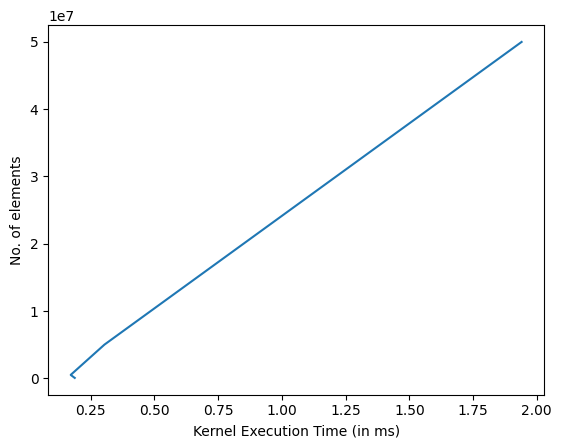

In [16]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0.187456, 0.171616, 0.303968, 1.94048])
ypoints = np.array([50000, 500000, 5000000, 50000000])

plt.plot(xpoints, ypoints)

plt.xlabel("Kernel Execution Time (in ms)")
plt.ylabel("No. of elements")

plt.show()